In [1]:
#Load Google play store data from a csv file

In [2]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Data Cleaning

## checking dataframe contains any Nan value?

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] =df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

In [9]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


## The rows of the column Rating having NULL values

In [10]:
df[df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


## The rows of the column Type having NULL values

In [ ]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


After cross-checking in the playstore the missing value is found to be Free, So Now we can fill the missing value with Free

In [12]:
df['Type'].fillna("Free", inplace = True)

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## The rows of the column Content Rating having NULL values

In [15]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


In [17]:
df.dropna(subset = ['Content Rating'], inplace=True)

## drop the unwanted columns

In [18]:
df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [20]:
modeValueRating = df['Rating'].mode()

In [21]:
modeValueRating[0]

4.4

In [22]:
df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [23]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


##  convert the data types with their respective actual type

Converting the Reviews column to integer.

## Column: Reviews

Converting the Reviews column to integer.

In [24]:
df['Reviews'] = df.Reviews.astype(int)

In [25]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


## Column: Size
Converting the Size Column from object to integer.

Removing the + Symbol

In [26]:
df['Size'] = df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

Removing the , Symbol

In [27]:
df['Size'] = df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

Replacing the M by multiplying the value with 1000000

In [28]:
df['Size'] = df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

Replacing the k by multiplying the value with 1000.

In [29]:
df['Size'] = df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

Replacing the Varies with device value with Nan.

In [30]:
df['Size'] = df.Size.replace('Varies with device', np.NaN)

Finally converting to Numeric type.

In [32]:
df['Size'] = pd.to_numeric(df['Size']) # Converting the string to Numeric type

In [33]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [34]:
df.dropna(subset = ['Size'], inplace=True)

In [35]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


## Column: Installs
Converting the Installs column from object to integer

First of all we will need to remove the + symbol from the values

In [36]:
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))

Then let's remove the , from the numbers.

In [37]:
df['Installs'] = df.Installs.apply(lambda x: x.replace(',', ''))

Lastly we will need to convert it from string type to numeric type

In [38]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [39]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


## Column: Price
Converting the Price column from objectto numeric

Let us have a look at the unique values of the column.

In [41]:
df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

We can remove the $ symbol from those values

In [43]:
df['Price'] = df.Price.apply(lambda x: x.strip('$'))

Now we can convert the values to Numeric type.

In [45]:
df['Price'] = pd.to_numeric(df['Price'])

In [46]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [47]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


## Data Visualization

In [48]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [49]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


## Q1) What Percentage of Applications are  Paid Or Free in Google Playstore?

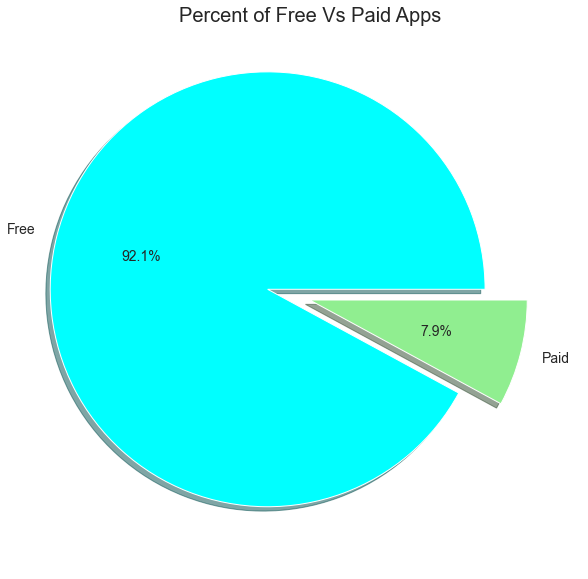

In [52]:
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["#00FFFF","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps',size = 20)
plt.show()

From the above graph we can see that 92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.

## Q2)What are Top Categories on Google Playstore? 

In [53]:
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

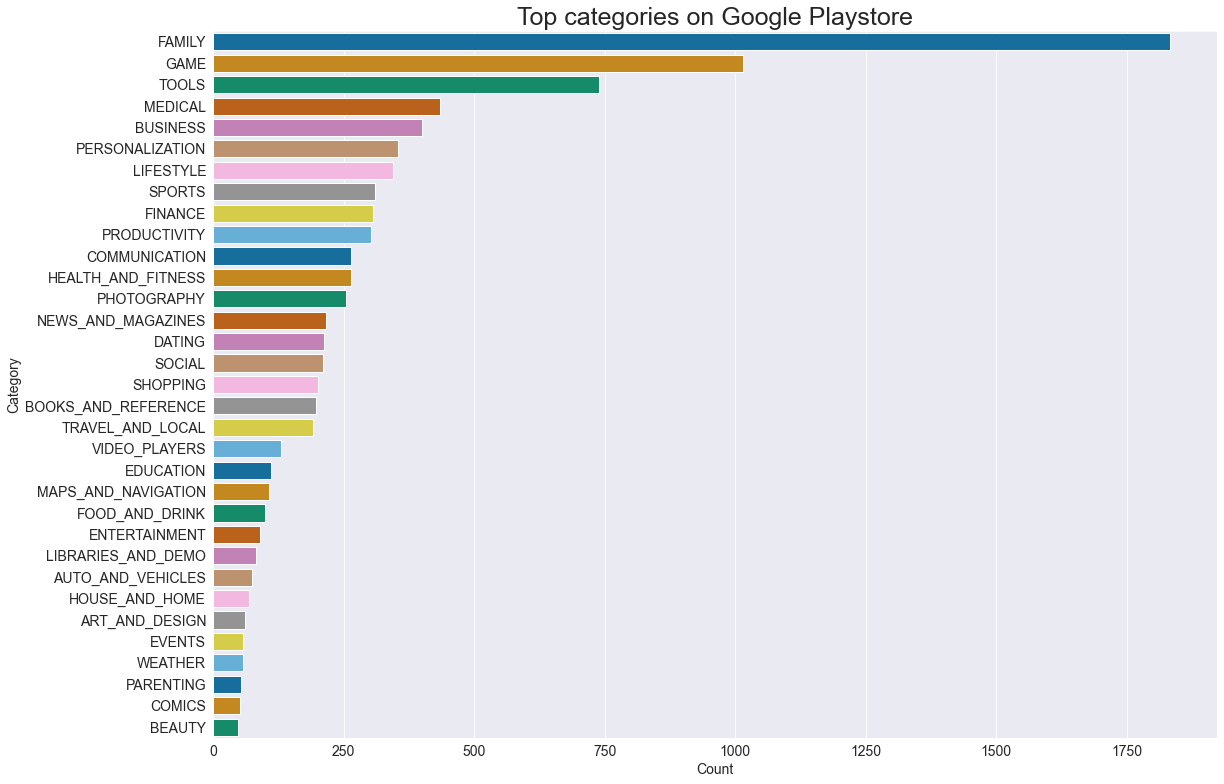

In [56]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "colorblind")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

From the above visualization, it can be interpreted that the top categories with highest installs are Game, Family, Communication, News & Magazines, & Tools.

## Q3) Which category of Apps from the Content Rating column are found more on playstore?

In [57]:
x2 = df['Content Rating'].value_counts().index
y2 = df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

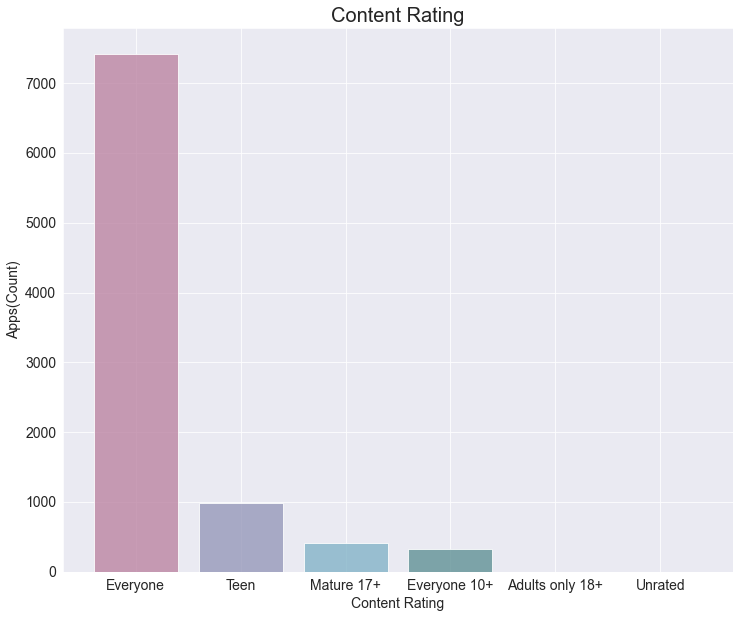

In [63]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#BC85A3','#9799BA','#84B4C8','#619196','#DFC7C1','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

From the above plot we can see that Everyone category has the highest number of apps.

## Q4)What does the distribution of the ratings signifies? 

In [64]:
df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

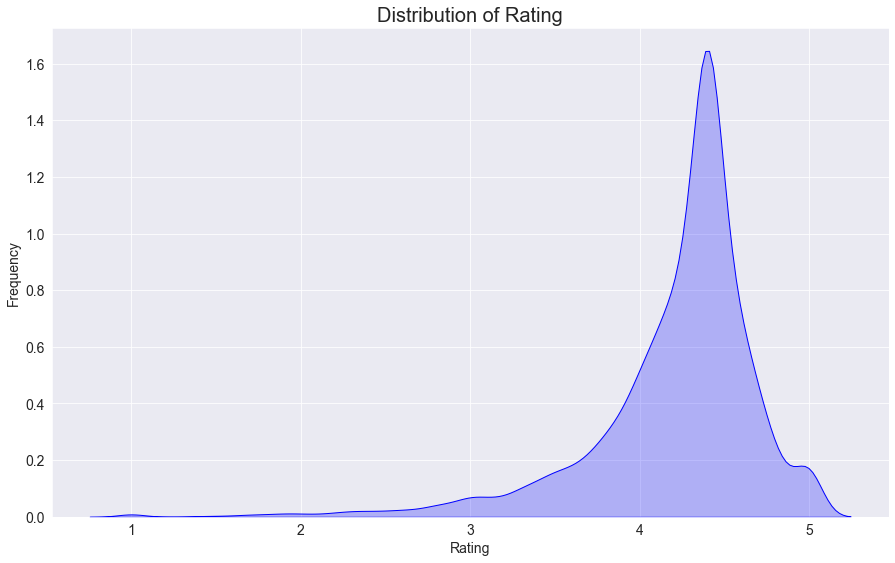

In [65]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

From the above graph we can conclude that most of the apps in google playstore are rated in between 3.5 to 4.8